<a href="https://colab.research.google.com/github/jhooni3/mlstudy/blob/master/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%EC%83%9D%EC%A1%B4%EC%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 타이타닉 생존률 맞추기


In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
!ls '/gdrive/My Drive/titanic'

gender_submission.csv  test.csv  train.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
test_df = pd.read_csv('/gdrive/My Drive/titanic/test.csv')
train_df = pd.read_csv('/gdrive/My Drive/titanic/train.csv')

In [5]:
train_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
train_df.set_index('PassengerId', inplace=True)
test_df.set_index('PassengerId', inplace=True)

In [8]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
train_index = train_df.index
test_index = test_df.index

In [0]:
y_train_df = train_df.pop("Survived")

In [12]:
y_train_df.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [13]:
test_df.isnull().sum() / len(test_df) #널탱이 데이터의 비율

Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.205742
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.002392
Cabin       0.782297
Embarked    0.000000
dtype: float64

In [0]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) #포매팅 소숫점두자리

In [15]:
train_df.isnull().sum() / len(train_df) * 100

Pclass      0.00
Name        0.00
Sex         0.00
Age        19.87
SibSp       0.00
Parch       0.00
Ticket      0.00
Fare        0.00
Cabin      77.10
Embarked    0.22
dtype: float64

널이 많은 cabin데이터를 날리자! 

In [0]:
del test_df["Cabin"]
del train_df["Cabin"]

In [17]:
all_df = train_df.append(test_df)
all_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C
3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,S
5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,S


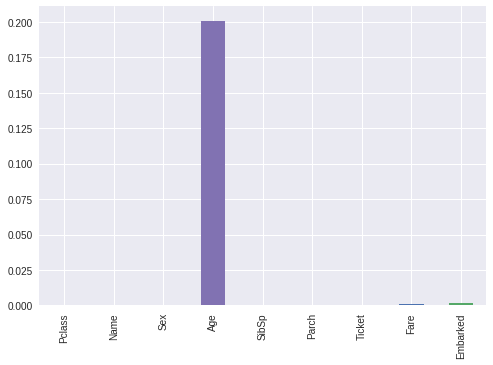

In [18]:
(all_df.isnull().sum() / len(all_df)).plot(kind='bar')
plt.show()

In [19]:
len(all_df)

1309

In [0]:
del all_df["Name"]

In [0]:
del all_df["Ticket"]

In [22]:
all_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.00,1,0,7.25,S
2,1,female,38.00,1,0,71.28,C
3,3,female,26.00,0,0,7.92,S
4,1,female,35.00,1,0,53.10,S
5,3,male,35.00,0,0,8.05,S


In [0]:
all_df["Sex"] = all_df["Sex"].replace({"male":0,"female":1})

In [24]:
all_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.00,1,0,7.25,S
2,1,1,38.00,1,0,71.28,C
3,3,1,26.00,0,0,7.92,S
4,1,1,35.00,1,0,53.10,S
5,3,0,35.00,0,0,8.05,S


In [25]:
all_df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [26]:
all_df["Pclass"].unique()

array([3, 1, 2])

In [0]:
all_df["Embarked"] = all_df["Embarked"].replace({"S":0,"C":1,"Q":2, np.nan:99})

In [28]:
all_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.00,1,0,7.25,0
2,1,1,38.00,1,0,71.28,1
3,3,1,26.00,0,0,7.92,0
4,1,1,35.00,1,0,53.10,0
5,3,0,35.00,0,0,8.05,0


In [29]:
pd.get_dummies(all_df["Embarked"], prefix="embarked")

,embarked_0,embarked_1,embarked_2,embarked_99
PassengerId,,,,
1,1,0,0,0
2,0,1,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0
6,0,0,1,0
7,1,0,0,0
8,1,0,0,0
9,1,0,0,0


In [30]:
matrix_df = pd.merge(all_df, pd.get_dummies(all_df["Embarked"], prefix="embarked"), left_index=True, right_index =True)
matrix_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,embarked_0,embarked_1,embarked_2,embarked_99
PassengerId,,,,,,,,,,,
1,3,0,22.00,1,0,7.25,0,1,0,0,0
2,1,1,38.00,1,0,71.28,1,0,1,0,0
3,3,1,26.00,0,0,7.92,0,1,0,0,0
4,1,1,35.00,1,0,53.10,0,1,0,0,0
5,3,0,35.00,0,0,8.05,0,1,0,0,0


In [31]:
all_df.groupby("Pclass")["Age"].mean()

Pclass
1   39.16
2   29.51
3   24.82
Name: Age, dtype: float64

In [32]:
pd.get_dummies(all_df["Pclass"], prefix="pclass")

,pclass_1,pclass_2,pclass_3
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
5,0,0,1
6,0,0,1
7,1,0,0
8,0,0,1
9,0,0,1


In [33]:

matrix_df2 = pd.merge(matrix_df, pd.get_dummies(all_df["Pclass"], prefix="pclass"), left_index=True, right_index =True)
matrix_df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,embarked_0,embarked_1,embarked_2,embarked_99,pclass_1,pclass_2,pclass_3
PassengerId,,,,,,,,,,,,,,
1,3,0,22.00,1,0,7.25,0,1,0,0,0,0,0,1
2,1,1,38.00,1,0,71.28,1,0,1,0,0,1,0,0
3,3,1,26.00,0,0,7.92,0,1,0,0,0,0,0,1
4,1,1,35.00,1,0,53.10,0,1,0,0,0,1,0,0
5,3,0,35.00,0,0,8.05,0,1,0,0,0,0,0,1


In [34]:
matrix_df2.groupby("Pclass")["Age"].mean()

Pclass
1   39.16
2   29.51
3   24.82
Name: Age, dtype: float64

In [0]:
matrix_df2.loc[(matrix_df2["Pclass"] == 1) & (matrix_df2["Age"].isnull()), "Age"] = 39.16

In [0]:
matrix_df2.loc[(matrix_df2["Pclass"] == 2) & (matrix_df2["Age"].isnull()), "Age"] = 29.51

In [0]:
matrix_df2.loc[(matrix_df2["Pclass"] == 3) & (matrix_df2["Age"].isnull()), "Age"] = 24.82

In [38]:
matrix_df2[matrix_df2["Age"].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,embarked_0,embarked_1,embarked_2,embarked_99,pclass_1,pclass_2,pclass_3
PassengerId,,,,,,,,,,,,,,


In [39]:
matrix_df2.isnull().sum()

Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
embarked_0     0
embarked_1     0
embarked_2     0
embarked_99    0
pclass_1       0
pclass_2       0
pclass_3       0
dtype: int64

In [40]:
matrix_df2.groupby("Pclass")["Fare"].mean()

Pclass
1   87.51
2   21.18
3   13.30
Name: Fare, dtype: float64

In [41]:
matrix_df2[matrix_df2["Fare"].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,embarked_0,embarked_1,embarked_2,embarked_99,pclass_1,pclass_2,pclass_3
PassengerId,,,,,,,,,,,,,,
1044,3,0,60.50,0,0,nan,0,1,0,0,0,0,0,1


In [0]:
matrix_df2.loc[matrix_df2["Fare"].isnull(), "Fare"] = 13.30

In [43]:
matrix_df2.isnull().sum()

Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
embarked_0     0
embarked_1     0
embarked_2     0
embarked_99    0
pclass_1       0
pclass_2       0
pclass_3       0
dtype: int64

In [44]:
matrix_df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,embarked_0,embarked_1,embarked_2,embarked_99,pclass_1,pclass_2,pclass_3
PassengerId,,,,,,,,,,,,,,
1,3,0,22.00,1,0,7.25,0,1,0,0,0,0,0,1
2,1,1,38.00,1,0,71.28,1,0,1,0,0,1,0,0
3,3,1,26.00,0,0,7.92,0,1,0,0,0,0,0,1
4,1,1,35.00,1,0,53.10,0,1,0,0,0,1,0,0
5,3,0,35.00,0,0,8.05,0,1,0,0,0,0,0,1


In [0]:
del matrix_df2["Embarked"]

In [46]:
matrix_df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,embarked_0,embarked_1,embarked_2,embarked_99,pclass_1,pclass_2,pclass_3
PassengerId,,,,,,,,,,,,,
1,3,0,22.00,1,0,7.25,1,0,0,0,0,0,1
2,1,1,38.00,1,0,71.28,0,1,0,0,1,0,0
3,3,1,26.00,0,0,7.92,1,0,0,0,0,0,1
4,1,1,35.00,1,0,53.10,1,0,0,0,1,0,0
5,3,0,35.00,0,0,8.05,1,0,0,0,0,0,1


In [0]:
del matrix_df2["Pclass"]

In [48]:

matrix_df2.head()

,Sex,Age,SibSp,Parch,Fare,embarked_0,embarked_1,embarked_2,embarked_99,pclass_1,pclass_2,pclass_3
PassengerId,,,,,,,,,,,,
1,0,22.00,1,0,7.25,1,0,0,0,0,0,1
2,1,38.00,1,0,71.28,0,1,0,0,1,0,0
3,1,26.00,0,0,7.92,1,0,0,0,0,0,1
4,1,35.00,1,0,53.10,1,0,0,0,1,0,0
5,0,35.00,0,0,8.05,1,0,0,0,0,0,1


In [49]:
matrix_df2.isnull().sum()

Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
embarked_0     0
embarked_1     0
embarked_2     0
embarked_99    0
pclass_1       0
pclass_2       0
pclass_3       0
dtype: int64

In [0]:
train_df = matrix_df2[matrix_df2.index.isin(train_index)]
test_df = matrix_df2[matrix_df2.index.isin(test_index)]

In [51]:
train_df.head()

,Sex,Age,SibSp,Parch,Fare,embarked_0,embarked_1,embarked_2,embarked_99,pclass_1,pclass_2,pclass_3
PassengerId,,,,,,,,,,,,
1,0,22.00,1,0,7.25,1,0,0,0,0,0,1
2,1,38.00,1,0,71.28,0,1,0,0,1,0,0
3,1,26.00,0,0,7.92,1,0,0,0,0,0,1
4,1,35.00,1,0,53.10,1,0,0,0,1,0,0
5,0,35.00,0,0,8.05,1,0,0,0,0,0,1


In [52]:
test_df.head()

,Sex,Age,SibSp,Parch,Fare,embarked_0,embarked_1,embarked_2,embarked_99,pclass_1,pclass_2,pclass_3
PassengerId,,,,,,,,,,,,
892,0,34.50,0,0,7.83,0,0,1,0,0,0,1
893,1,47.00,1,0,7.00,1,0,0,0,0,0,1
894,0,62.00,0,0,9.69,0,0,1,0,0,1,0
895,0,27.00,0,0,8.66,1,0,0,0,0,0,1
896,1,22.00,1,1,12.29,1,0,0,0,0,0,1


전처리 완료 모델 만들기


In [53]:
y_train_df.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [0]:
x_data = train_df.as_matrix()
y_data = y_train_df.as_matrix()

In [55]:
x_data.shape, y_data.shape

((891, 12), (891,))

In [56]:
x_data

array([[ 0.  , 22.  ,  1.  , ...,  0.  ,  0.  ,  1.  ],
       [ 1.  , 38.  ,  1.  , ...,  1.  ,  0.  ,  0.  ],
       [ 1.  , 26.  ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       ...,
       [ 1.  , 24.82,  1.  , ...,  0.  ,  0.  ,  1.  ],
       [ 0.  , 26.  ,  0.  , ...,  1.  ,  0.  ,  0.  ],
       [ 0.  , 32.  ,  0.  , ...,  0.  ,  0.  ,  1.  ]])

In [57]:
y_data

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [58]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()
cls.fit(x_data,y_data)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
cls.intercept_ 

array([0.18829675])

In [60]:
cls.coef_

array([[ 2.60750665e+00, -4.07586678e-02, -3.25647165e-01,
        -8.49180078e-02,  2.48637600e-03, -2.45258167e-01,
         1.66095756e-01,  6.65916091e-02,  2.00867547e-01,
         1.11465026e+00,  1.52999437e-01, -1.07935295e+00]])

In [61]:
cls.predict(test_df.values)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [0]:
x_test = test_df.as_matrix()

In [63]:
y_test =cls.predict(x_test)
y_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [64]:
result = np.concatenate( (test_index.values.reshape(-1,1),
                 cls.predict(x_test).reshape(-1,1)  ) , axis=1)
result[:5]

array([[892,   0],
       [893,   0],
       [894,   0],
       [895,   0],
       [896,   1]])

In [65]:
df_submssion =pd.DataFrame(result, columns=["PassengerId","Survived"])
df_submssion

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [0]:
df_submssion.to_csv("/gdrive/My Drive/titanic/submission_result.csv",index=False)

In [67]:
!ls


sample_data  submission_result.csv
